In [24]:
import csv
import re
import matplotlib.pyplot as plt
import numpy as np

In [61]:
runTimes = {}
with open('results.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        runName = row[0]
        runTimes[runName] = {
            "P3ANUT Single": row[1],
            "P3ANUT Single std": row[2],
            "P3ANUT Multi": row[3],
            "P3ANUT Multi std": row[4],
            "Rebollo" : row[5],
            "Rebollo std" : row[6]
        }
        

In [6]:
print(runTimes)

{'BSA1 R1A': {'P3ANUT Single': '241.27183513641359', 'P3ANUT Multi': '69.99205112457275', 'Rebollo': '203.74260573387147'}, 'BSA1 R1U': {'P3ANUT Single': '140.55667653083802', 'P3ANUT Multi': '43.26563153266907', 'Rebollo': '121.25970554351807'}, 'BSA1 R2U': {'P3ANUT Single': '452.169048500061', 'P3ANUT Multi': '141.98810381889342', 'Rebollo': '357.04239830970766'}, 'RebolloBSA2 R1A': {'P3ANUT Single': '155.04387497901917', 'P3ANUT Multi': '55.00564045906067', 'Rebollo': '129.3874771118164'}, 'BSA2 R1U': {'P3ANUT Single': '191.29237294197083', 'P3ANUT Multi': '67.8640498161316', 'Rebollo': '161.5274574279785'}, 'BSA2 R2U': {'P3ANUT Single': '149.71932291984558', 'P3ANUT Multi': '55.367240524291994', 'Rebollo': '124.88972544670105'}, 'BSA3 R1A': {'P3ANUT Single': '181.82261428833007', 'P3ANUT Multi': '69.75525116920471', 'Rebollo': '149.9928096294403'}, 'BSA3 R1U': {'P3ANUT Single': '183.04486865997313', 'P3ANUT Multi': '70.64645185470582', 'Rebollo': '154.89086122512816'}, 'BSA3 R2U': 

In [47]:
fileSizes = {"BSA1 R1A" : 1099164 + 1099390,
             "BSA2 R1A" : 1099327 + 1099390,
            "BSA1 R1U" : 651485 + 651586,
            "BSA1 R2U" : 2153333 + 2153624,
            "BSA2 R1A" : 1693269 + 1693365,
            'BSA2 R1U' : 2254741 + 2254918,
            'BSA2 R2U' : 2476045+2476136,
            "BSA3 R1A" : 2727923 + 2728093,
            "BSA3 R1A" : 3230457+3230555,
            "BSA3 R1U" : 3230457 + 3230555,
            "BSA3 R2U" : 3571561 + 3571679,
            "CA1 R1A" : 3959455 + 3959576,
            "CA1 R1U" : 4425892 + 4426054,
            "CA1 R2U" : 4781000 + 4781194,
            "CA2 R1A" : 4236525 + 4236629,
            "CA2 R1U" : 4690220 + 4690335,
            "CA2 R2U" : 5626241 + 5626496,
            "CA3 R1A" : 6032676 + 6032815,
            "CA3 R1U" : 6012212 + 6012311,
            "CA3 R2U" : 6534574 + 6534718,
            "IGG1 R1A" : 6492196 + 6492375,
            "IGG1 R1U" : 7374096 + 7374338,
            "IGG1 R2U" : 8181042 + 8181257,
            "IGG2 R1A" : 8040243 + 8040428,
            "IGG2 R1U" : 8420521 + 8420643,
            "IGG2 R2U" : 10269447 + 10269812,
            "CA1 R1A" : 3959455 + 3959576,
            "IGG3 R2U" : 11529302 + 11529472,
            }

# "IGG3 R1A" : 11076069 + 11076294,
#             "IGG3 R1U" : 10958869 + 10958971,
#             "LA1 R1A" : 11548384 + 11548514,
#             "LA1 R1U" : 12404777 + 12404905,
#             "LA1 R2U" : 13297825 + 13298023,
#             "LA2 R1A" : 13015415 + 13015561,
#             "LA2 R1U" : 12884680 + 12884794,
#             "LA2 R2U" :13195970 + 13196088,
#             "LA3 R1A" : 13430450 + 13430608,
#             "LA3 R1U" : 13967499 + 13967634,
#             "LA3 R2U" : 14627260 + 14627383,
#             "LB1 R1A" : 14719461 + 14719592,
#             "LB1 R1U" : 16045115 + 16045401,
#             "LB1 R2U" : 15855424 + 15855561,
#             "LB2 R1A" : 16015903 + 16016062,
#             "LB2 R1U" : 16108324 + 16108424,
#             "LB2 R2U" : 17369225 + 17369420,
#             "LB3 R1A" : 16762551 + 16762697,
#             "LB3 R1U" : 17139704 + 17139804,
#             "LB3 R2U" : 17829237 + 17829353,
#             "PRE-TR" : 19137944 + 19139231,
#             "RCA1 R1A" : 18417040 + 18417166,
#             "RCA1 R1U" : 18396512 + 18396795,
#             "RCA1 R2U" : 19515439 + 19515660,
#             'RCA2 R1A' : 20685063 + 20685343,
#             "RCA2 R2U" : 22551660 + 22552051,
#             "RCA3 R1A" : 22021528 + 22021658,
#             "RCA3 R1U" : 22120472 + 22120602,
#             "RCA3 R2U" : 23198837 + 23199035,
#             "UNPAN" : 23784616 + 23784832,
#             "CA1 R1A" : 3959455 + 3959576,
#             "IGG3 R2U" : 11529302 + 11529472,
#             "RCA2 R1U" : 20798812 + 20798904

In [ ]:
['RCA2 R1A', 'RCA2 R1U', 'RCA2 R2U', 'RCA3 R1A', 'RCA3 R1U', 'RCA3 R2U', 'UNPAN']
[1099164]

In [48]:
singleTimes = []
singleTimesStd = []
multiTimes = []
rebolloTimes = []
fileSizesList = []

for key in fileSizes.keys():
    singleTimes.append(float(runTimes[key]["P3ANUT Single"]))
    multiTimes.append(float(runTimes[key]["P3ANUT Multi"]))
    rebolloTimes.append(float(runTimes[key]["Rebollo"]))
    fileSizesList.append(float(fileSizes[key]))

In [28]:
print(singleTimes)

[241.27183513641359, 140.55667653083802, 452.169048500061, 155.04387497901917, 191.29237294197083, 149.71932291984558, 181.82261428833007, 183.04486865997313, 213.35850415229797, 150.486549949646, 183.83856773376465, 244.5117718219757, 124.80844559669495, 182.94756631851197, 347.14103841781616, 187.29700164794923, 136.72590665817262, 261.7344969272614, 231.78177976608276, 421.99872131347655, 388.68558831214904, 264.9984040260315, 207.96015162467955, 487.1251754760742, 317.23497281074526, 170.2823516368866, 300.2494420528412, 161.6648756980896, 225.04069876670837, 366.4037416934967, 211.06406898498534, 167.0065983772278, 226.9456018924713, 143.90810537338257, 198.29970808029174, 195.96925134658812, 210.07323589324952, 355.39168910980226, 258.7364279747009, 173.39108409881592, 180.57108716964723, 356.56321811676025, 217.81692156791686, 133.42783102989196, 211.5676709651947, 568.5926628112793, 220.04660534858704, 149.42510018348693, 320.8754508972168, 431.63598136901857, 178.9417594432830

In [50]:
slowerSingle = np.array(singleTimes) / np.array(rebolloTimes)
print(np.mean(slowerSingle))

1.2291114576781579


In [51]:
slowerMulti = np.array(multiTimes) / np.array(rebolloTimes)
print(np.mean(slowerMulti))

0.57100110043786


In [52]:
mSingle, bSingle = np.polyfit(fileSizesList, singleTimes, 1)
mMulti, bMulti = np.polyfit(fileSizesList, multiTimes, 1)
mRebollo, bRebollo = np.polyfit(fileSizesList, rebolloTimes, 1)

In [58]:
print(min(fileSizesList))
print(max(fileSizesList))

1303071.0
23058774.0


In [73]:
roundLambda = lambda x: round(float(x), 2)

for key, value in runTimes.items():
    print(f"{key} & {roundLambda(value['P3ANUT Single'])} & {roundLambda(value['P3ANUT Single std'])} & {roundLambda(value['P3ANUT Multi'])} & {roundLambda(value["P3ANUT Multi std"])} & {roundLambda(value['Rebollo'])} & {roundLambda(value["Rebollo std"])}  \\\\")

BSA1 R1A & 241.27 & 134.39 & 69.99 & 34.23 & 203.74 & 10.71  \\
BSA1 R1U & 140.56 & 66.85 & 43.27 & 17.08 & 121.26 & 2.35  \\
BSA1 R2U & 452.17 & 176.44 & 141.99 & 41.46 & 357.04 & 0.55  \\
BSA2 R1A & 155.04 & 52.54 & 55.01 & 11.62 & 129.39 & 0.85  \\
BSA2 R1U & 191.29 & 68.65 & 67.86 & 16.25 & 161.53 & 3.06  \\
BSA2 R2U & 149.72 & 71.98 & 55.37 & 18.07 & 124.89 & 2.33  \\
BSA3 R1A & 181.82 & 61.79 & 69.76 & 13.29 & 149.99 & 2.36  \\
BSA3 R1U & 183.04 & 82.07 & 70.65 & 21.56 & 154.89 & 3.12  \\
BSA3 R2U & 213.36 & 62.15 & 88.48 & 12.92 & 176.07 & 0.75  \\
CA1 R1A & 150.49 & 52.98 & 73.87 & 14.3 & 128.38 & 2.96  \\
CA1 R1U & 183.84 & 95.79 & 80.95 & 26.52 & 147.49 & 1.49  \\
CA1 R2U & 244.51 & 134.92 & 96.49 & 35.07 & 198.4 & 0.4  \\
CA2 R1A & 124.81 & 48.49 & 69.84 & 14.17 & 103.87 & 1.23  \\
CA2 R1U & 182.95 & 88.64 & 83.04 & 25.83 & 142.78 & 0.53  \\
CA2 R2U & 347.14 & 99.63 & 150.23 & 22.07 & 289.21 & 8.83  \\
CA3 R1A & 187.3 & 83.81 & 104.34 & 30.42 & 156.23 & 8.64  \\
CA3 R1U & 13

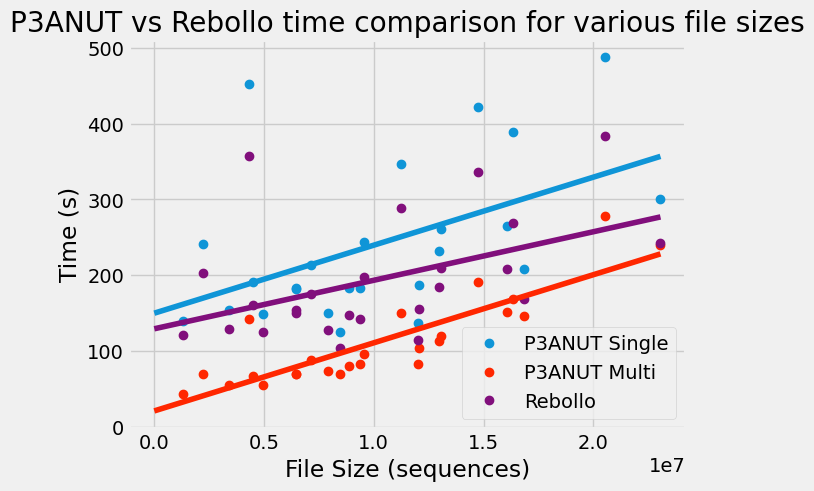

In [59]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

maxFileSize = max(fileSizesList)


ax.plot(fileSizesList, singleTimes, 'o', label='P3ANUT Single', color='#0F95D7')
ax.plot(fileSizesList, multiTimes, 'o', label='P3ANUT Multi', color='#FF2700')
ax.plot(fileSizesList, rebolloTimes, 'o', label='Rebollo', color='#810F7C')

plt.plot([0, maxFileSize], [bSingle, mSingle * maxFileSize + bSingle], color='#0F95D7' )
plt.plot([0, maxFileSize], [bMulti, mMulti * maxFileSize + bMulti ], color='#FF2700')
plt.plot([0, maxFileSize], [bRebollo, mRebollo * maxFileSize + bRebollo], color='#810F7C')

plt.xlabel('File Size (sequences)')
plt.ylabel('Time (s)')
plt.title('P3ANUT vs Rebollo time comparison for various file sizes')

plt.legend()

plt.show()